# Lab 4: Model Performance Evaluation


This lab material is largely self-contained. We assume that every student has already taken STAT7008 or knows some basic operations of Python. Noet that you may use Anaconda to run the .ipynb file. For the installation of Anaconda, please see https://conda.io/docs/user-guide/install/index.html.

### Purpose

In Lab 4, you will learn how to:

a. generate binary category data. 

b. do logistic regression. 

c. plot Receiver Operating Characteristic (ROC) curve.

### Useful libraries for this Lab

a. numpy, for data array. 

b. matplotlib, for plotting. 

c. sklearn, for modelling.

d. os, for the working directory. 

In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import os

wd = os.getcwd() # Set your working directory. 
print wd

/home/renjielu/PycharmProjects/DM8017/DM_Lab4


In Lab 4, we consider a binary classification problem. We generate data by 

$$y = \left\{ \begin{array}{rcl} 1, & f(z), \\ \\ -1,  & 1-f(z),\end{array}\right.$$

where $$f(z)= \frac{1}{1+exp(-z)} $$  and $z= 2+8x_1+0.8x_2$ with $x_1$ and $x_2$ are independent standard normal variates. The sample size $n$ is equal to 712. 

In [2]:
mean_ = [0,0]
cov_ = [[1,0],[0,1]]
n = 712

x1,x2 = np.random.multivariate_normal(mean_,cov_,n).T

z = 2+8*x1+0.8*x2

f_z = 1./(1+np.exp(-z))

y = np.array([1 if np.random.rand()<=p else -1 for p in f_z ])

Next, based on the data, we do linear and logistic regression, respectively. After we obtain the estimated models, we take advantage of ROC curve to do model comparision. Actually, the linear model cannot  classify the data directly. Therefore, a simple rule below is proposed for linear model to do classification.

$$\hat{y} = \left\{ \begin{array}{rcl} 1, & \mbox{if } \hat{b}_{0}+\hat{b}_1 x_1+\hat{b}_2 x_2\geq 0, \\ \\ -1,  & \mbox{otherwise.}\end{array}\right.$$

Note that in Sklearn, the function called LogisticRegression estimates the model with a regularization (L1 or L2). In order to estimate the original loss function only, we set the arugment C, inverse of regularization strength, in this function as a large value, say 1000. We give two confusion matrices for each fitted model. The results show that both classification methods are quit similar. 

In [3]:
def confusion_matrix(y, y_hat):
    
    TP = sum([1 if (y[i]==1) and (y_hat[i]==1) else 0 for i in range(len(y))])
    TN = sum([1 if (y[i]==-1) and (y_hat[i]==-1) else 0 for i in range(len(y))])
    FP = sum([1 if (y[i]==1) and (y_hat[i]==-1) else 0 for i in range(len(y))])
    FN = sum([1 if (y[i]==-1) and (y_hat[i]==1) else 0 for i in range(len(y))])
    
    return np.array([[TP,FP],[FN,TN]])

data = np.concatenate((y.reshape((n,1)), 
                       x1.reshape((n,1)), 
                       x2.reshape((n,1))),axis=1)


# for linear regression, and classification. 
lr = linear_model.LinearRegression()
lr.fit(data[:,1:], data[:,0])
lr_predict = lr.predict(data[:,1:])
print 'Coefficients of linear regression: ', lr.coef_
# classification
y_hat = np.array([1 if x>=0 else -1 for x in lr_predict])

print 'Confusion matrix of linear model: '
print confusion_matrix(y, y_hat)

# for logistic regression.
logr = linear_model.LogisticRegression(C=1000.0) 
logr.fit(data[:,1:], data[:,0])
logr_predict = logr.predict(data[:,1:])
logr_predict_proba = logr.predict_proba(data[:,1:])

print 'Coefficients of logistic regression: ', logr.coef_[0]
print 'Confusion matrix of logistic model: '
print confusion_matrix(y, logr_predict)

Coefficients of linear regression:  [ 0.77700811  0.08070102]
Confusion matrix of linear model: 
[[392  20]
 [ 20 280]]
Coefficients of logistic regression:  [ 8.29719436  1.02085007]
Confusion matrix of logistic model: 
[[396  16]
 [ 19 281]]


Noth that in the previous part, the cut-off points for logistic and linear regression are 0 and 0.5. Next, we plot ROC curve by using different cut-off points. In ROC curve, the green line refers to the benchmark. Orange and blue lines denote logistic and linear regression, respectively. According to ROC chart below, we conclude that in this case, logistic model is slightly better than linear model due to larger area of its ROC.

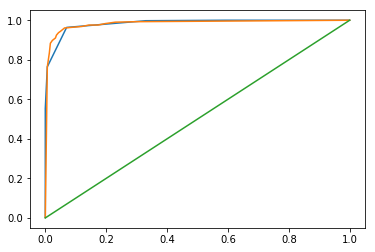

In [4]:
number_points = 19

cut_points_lr = np.linspace(min(lr_predict),max(lr_predict),number_points)
cut_points_logr = np.linspace(min(logr_predict_proba[:,1]),max(logr_predict_proba[:,1]),number_points)

P = sum([1 for x in y if x==1]) # compute the total number of 1
N = sum([1 for x in y if x==-1]) # compute the total number of -1

ROC_lr = []
ROC_logr = []

for i in range(number_points):
    
    y_hat_lr = np.array([1 if x>=cut_points_lr[i] else -1 for x in lr_predict])
    
    Tmp_CM = confusion_matrix(y, y_hat_lr)
    TP = Tmp_CM[0][0]
    TN = Tmp_CM[1][1]
    ROC_lr.append([float(TP)/P, 1-float(TN)/N])
    
    y_hat_logr = np.array([1 if x>=cut_points_logr[i] else -1 for x in logr_predict_proba[:,1]])
    
    Tmp_CM = confusion_matrix(y, y_hat_logr)
    TP = Tmp_CM[0][0]
    TN = Tmp_CM[1][1]
    ROC_logr.append([float(TP)/P, 1-float(TN)/N])
    
plt.plot(-np.sort(-np.array(ROC_lr)[:,1]),np.array(ROC_lr)[:,0])
plt.plot(-np.sort(-np.array(ROC_logr)[:,1]),np.array(ROC_logr)[:,0])
plt.plot([0,1],[0,1])

plt.show()